In [ ]:
%tensorflow_version 2x
import tensorflow as tf
tf.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


'2.2.0-rc2'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
# Now it is time to explore this data set using pandas and seaborn 
df = pd.read_csv('kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [ ]:
# We don't have null values AKA data is complete

# no missing data which makes sense because this data about house we were already sold.
# df.isnull().sum()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


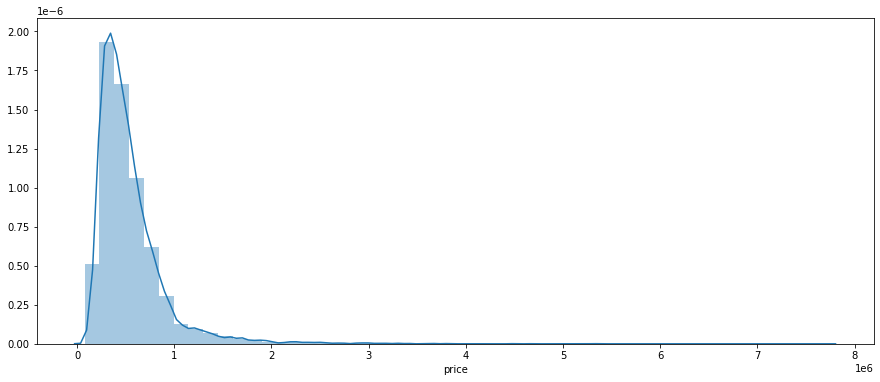

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'])

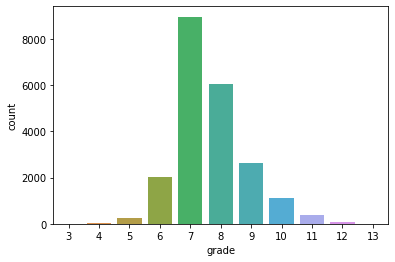

In [ ]:
sns.countplot(df['grade'])

In [ ]:
df.corr()['price'].sort_values

<bound method Series.sort_values of id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64>

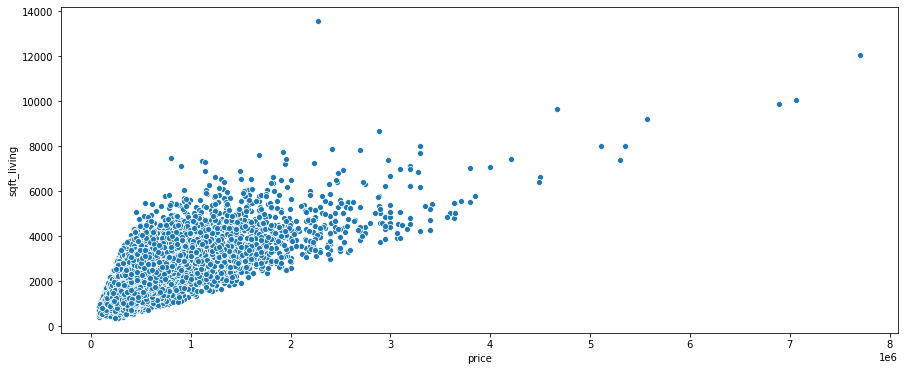

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='price',y='sqft_living')

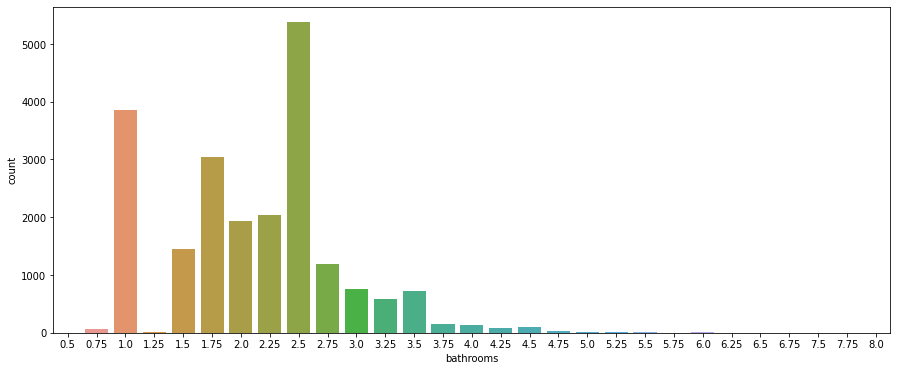

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['bathrooms'])

In [ ]:
the99_df = df.sort_values('price',ascending=False).iloc[216:]

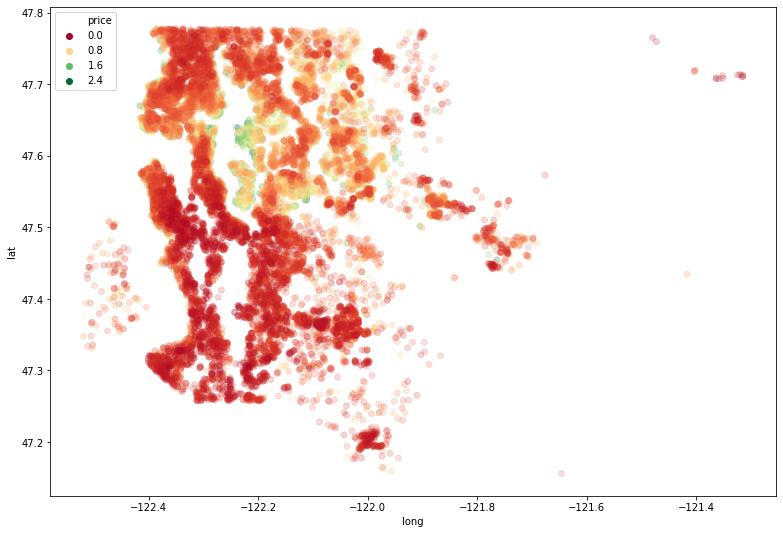

In [ ]:
plt.figure(figsize=(13,9))
sns.scatterplot(x='long',y='lat', data=the99_df,
                edgecolor=None,palette='RdYlGn',alpha=0.2,hue='price')

In [ ]:
# to drop a column use the axis 1
df = df.drop('id',axis=1)

In [ ]:
# Changes to data type from object string (12/03/20) to datetime 
# now we can grab by moth, date or day and if prices changes based on that
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
#def year_ext(date):
#  return date.year
# es lo mismo que esta lambda
 
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [ ]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2


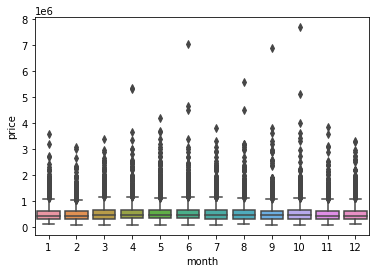

In [ ]:
sns.boxplot(x='month',y='price',data=df)
# This is not very clear to indicate any corralation, it may be to see the acutal numbers

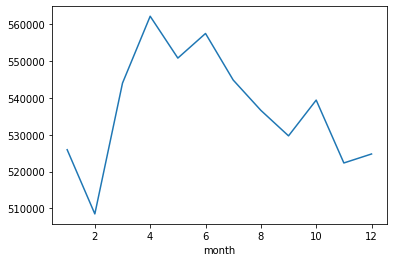

In [ ]:
df.groupby('month').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


In [ ]:
# it has numeric info so it may assume there one is bigger than others.
# and it 70 unico value to have it as categories 
# based on correlations it has -0.5..
df = df.drop('zipcode',axis=1)

In [ ]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# This is data frame so we select the features and lebels?
# remember the sklearn works is that it only accepts arrays 
# we use .values to return an array
X = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [ ]:
scaler = MinMaxScaler()

# we can fit and transform in one line
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# it may be a good a idea to have many neaurons as feautre
X_train.shape

(15117, 19)

In [ ]:
# instatiante the squential model 
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
# here just compare how well training data does againt the test data
# the valiation doesn't interfere with traninig 
# Validation data helps us decide the number or epochs and layers 

# also because it is a large date, we do it in batches 
# it is commonly done in power of 2, 64, 128, 256 etc
# the smaller the dataset, the longer the training is going to take 
# but the less likely it is that we overfit the data
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 6ms/step - loss: 429219446784.0000 - val_loss: 418369273856.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 428883640320.0000 - val_loss: 413240098816.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 407589617664.0000 - val_loss: 369161830400.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 317745692672.0000 - val_loss: 230885539840.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 163175432192.0000 - val_loss: 105997844480.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 101474533376.0000 - val_loss: 94458822656.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 97886814208.0000 - val_loss: 92985548800.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 94912667648.0000 - val_loss: 91358167040.0000
Epoch 9/400
119/119 [

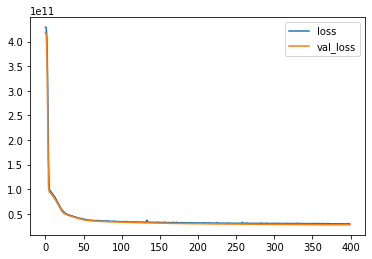

In [ ]:
# Although the loss slowed down towards the end, we could have countinue training because the valitation loss kept going down
# this is a sing we could have conitnue training

# but if the vad_loss started to go up, that's a sign the it is being overfitted 
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

166029.29524154097

In [ ]:
# so this is good or bad? Well, it depends
# what's the avg price of a house?
mean_absolute_error(y_test, predictions)

102573.19833140432

In [ ]:
# based on the mean, we are off by 20%
# not great, not terriable 
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
5.402966e+05

540296.6

In [ ]:
explained_variance_score(y_test, predictions)

0.7921421858609403

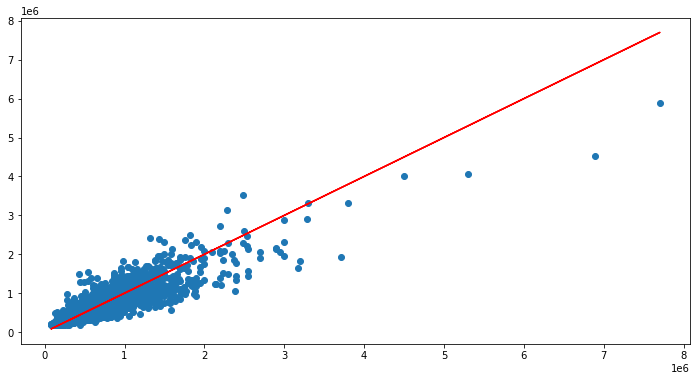

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [ ]:
# Basically, let's say we want to know the prediction of the first house
# Assing a new variable to and drop only the price
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
# Reshape the and scale the arrays again
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
# do the prediction for the selected house
model.predict(single_house)

array([[277230.53]], dtype=float32)

In [ ]:
# it is of by 50k
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
